In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob

In [33]:
def load_counts(file):
    df = pd.read_csv(file, sep=None, engine='python')
    return df['Count']

In [34]:
def compute_stats(counts):
    total = counts.sum()
    mean = counts.mean()
    std = counts.std()
    theo_std = np.sqrt(total) / len(counts)
    return mean, std, total, theo_std

In [35]:
def get_absorber_thicknesses(n):
    return np.arange(1, n+1)  # Al1, Al2, ... -> 1, 2, ...

In [36]:
def total_counts_with_error(files):
    totals = []
    errors = []
    for file in files:
        counts = load_counts(file)
        total = counts.sum()
        error = np.sqrt(total)
        totals.append(total)
        errors.append(error)
    return np.array(totals), np.array(errors)

In [37]:
def attenuation_coefficient(x, y):
    """
    Fit y = A * exp(-μx) → log(y) = -μx + log(A)
    Returns: μ (attenuation coefficient), fit coefficients [slope, intercept]
    """
    log_y = np.log(y)
    coeffs = np.polyfit(x, log_y, 1)
    return -coeffs[0], coeffs

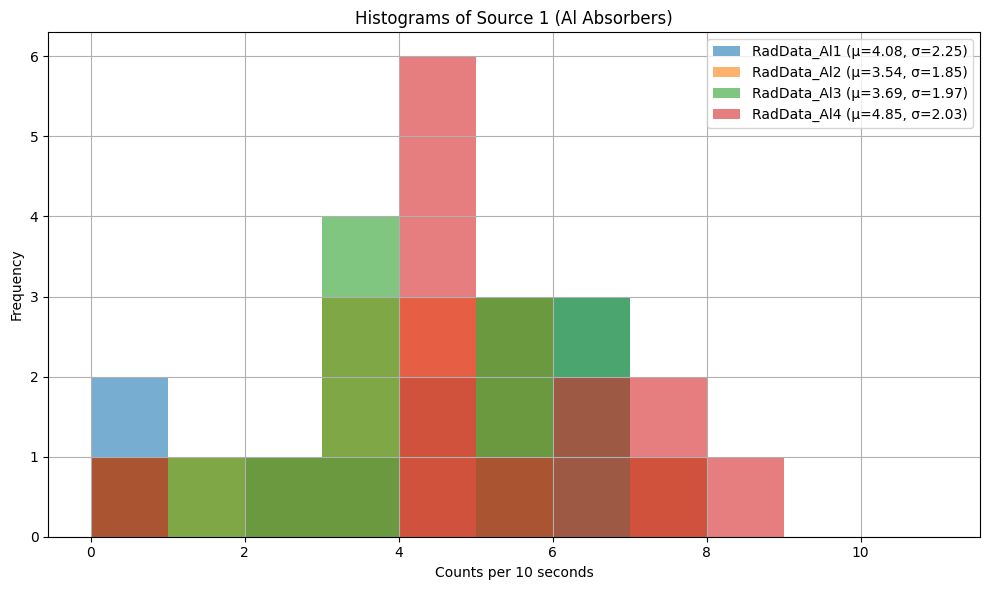

In [38]:
# 1. Plot histograms for source 1 (Al1–Al4) 
al_files_s1 = sorted(glob("RadData_Al*.csv"))
counts_dict = {}
stats_dict = {}

plt.figure(figsize=(10, 6))
bins = np.arange(0, 12, 1)

for file in al_files_s1:
    label = os.path.splitext(os.path.basename(file))[0]
    counts = load_counts(file)
    counts_dict[label] = counts
    μ, σ, total, theo_σ = compute_stats(counts)
    stats_dict[label] = {'mean': μ, 'std': σ, 'total': total, 'theoretical_std': theo_σ}
    plt.hist(counts, bins=bins, alpha=0.6, label=f"{label} (μ={μ:.2f}, σ={σ:.2f})")

plt.xlabel("Counts per 10 seconds")
plt.ylabel("Frequency")
plt.title("Histograms of Source 1 (Al Absorbers)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

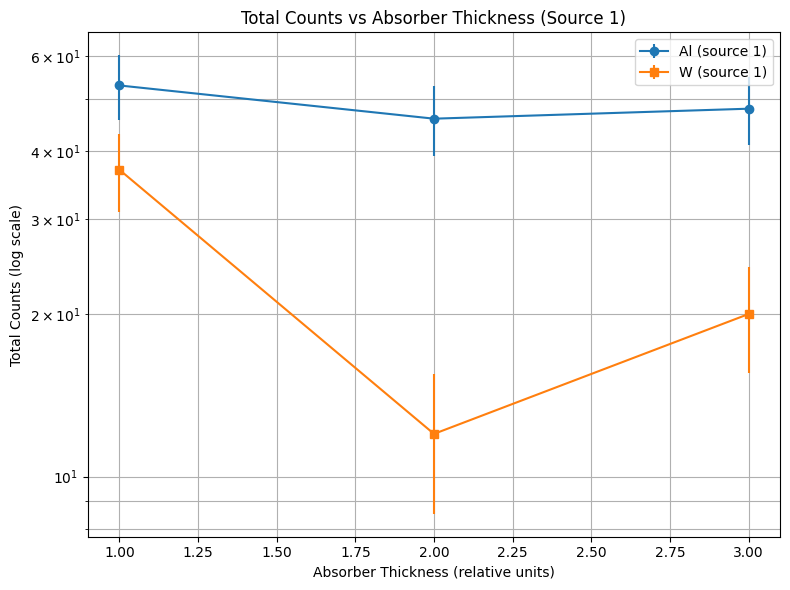

In [39]:
# 2. Log plot: total counts vs absorber thickness (Al & W for source 1)
w_files_s1 = sorted(glob("RadData_T*.csv"))
al_totals, al_errors = total_counts_with_error(al_files_s1)
w_totals, w_errors = total_counts_with_error(w_files_s1)

# Trim to match sizes
min_len = min(len(al_totals), len(w_totals))
thickness = get_absorber_thicknesses(min_len)

plt.figure(figsize=(8, 6))
plt.errorbar(thickness, al_totals[:min_len], yerr=al_errors[:min_len], fmt='o-', label="Al (source 1)")
plt.errorbar(thickness, w_totals[:min_len], yerr=w_errors[:min_len], fmt='s-', label="W (source 1)")
plt.yscale('log')
plt.xlabel("Absorber Thickness (relative units)")
plt.ylabel("Total Counts (log scale)")
plt.title("Total Counts vs Absorber Thickness (Source 1)")
plt.legend()
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

Estimated μ for Al (source 1): 0.050
Estimated μ for W  (source 1): 0.308


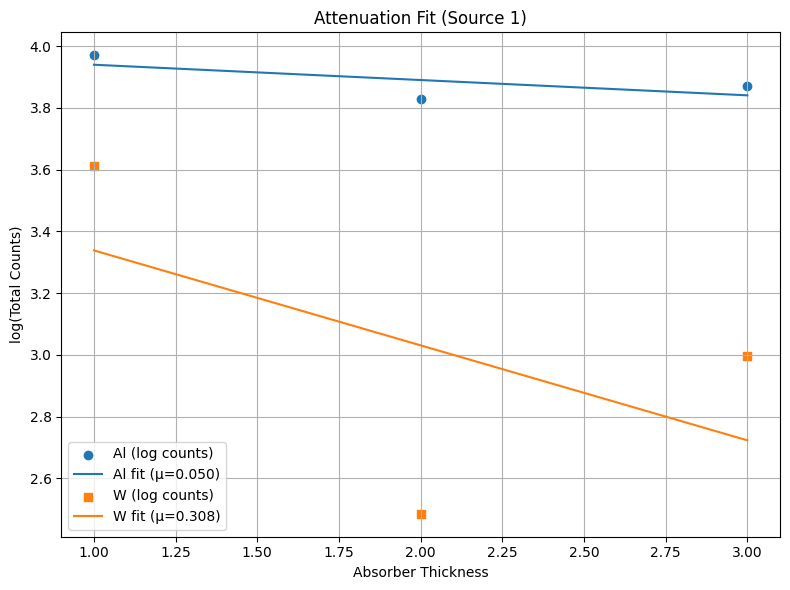

In [40]:
# 3. Estimate attenuation coefficients and fit lines
μ_al, al_fit = attenuation_coefficient(thickness, al_totals[:min_len])
μ_w, w_fit = attenuation_coefficient(thickness, w_totals[:min_len])

print(f"Estimated μ for Al (source 1): {μ_al:.3f}")
print(f"Estimated μ for W  (source 1): {μ_w:.3f}")

plt.figure(figsize=(8, 6))
plt.scatter(thickness, np.log(al_totals[:min_len]), label='Al (log counts)', marker='o')
plt.plot(thickness, np.polyval(al_fit, thickness), label=f'Al fit (μ={μ_al:.3f})')

plt.scatter(thickness, np.log(w_totals[:min_len]), label='W (log counts)', marker='s')
plt.plot(thickness, np.polyval(w_fit, thickness), label=f'W fit (μ={μ_w:.3f})')

plt.xlabel("Absorber Thickness")
plt.ylabel("log(Total Counts)")
plt.title("Attenuation Fit (Source 1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

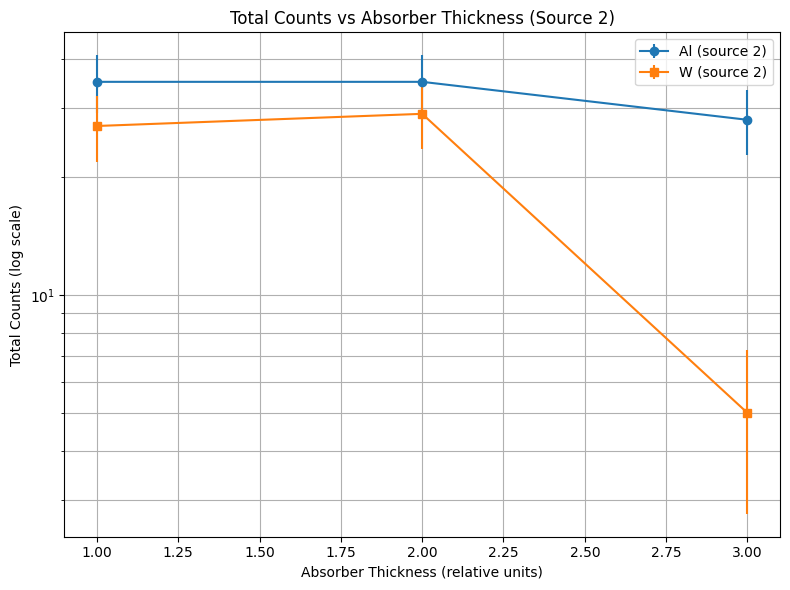

In [41]:
# 4. REPEAT FOR SOURCE 2
al_files_s2 = sorted(glob("RadData2_Al*.csv"))
w_files_s2 = sorted(glob("RadData2_T*.csv"))

al2_totals, al2_errors = total_counts_with_error(al_files_s2)
w2_totals, w2_errors = total_counts_with_error(w_files_s2)
min_len_2 = min(len(al2_totals), len(w2_totals))
thickness2 = get_absorber_thicknesses(min_len_2)

plt.figure(figsize=(8, 6))
plt.errorbar(thickness2, al2_totals[:min_len_2], yerr=al2_errors[:min_len_2], fmt='o-', label="Al (source 2)")
plt.errorbar(thickness2, w2_totals[:min_len_2], yerr=w2_errors[:min_len_2], fmt='s-', label="W (source 2)")
plt.yscale('log')
plt.xlabel("Absorber Thickness (relative units)")
plt.ylabel("Total Counts (log scale)")
plt.title("Total Counts vs Absorber Thickness (Source 2)")
plt.legend()
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

Estimated μ for Al (source 2): 0.112
Estimated μ for W  (source 2): 0.843


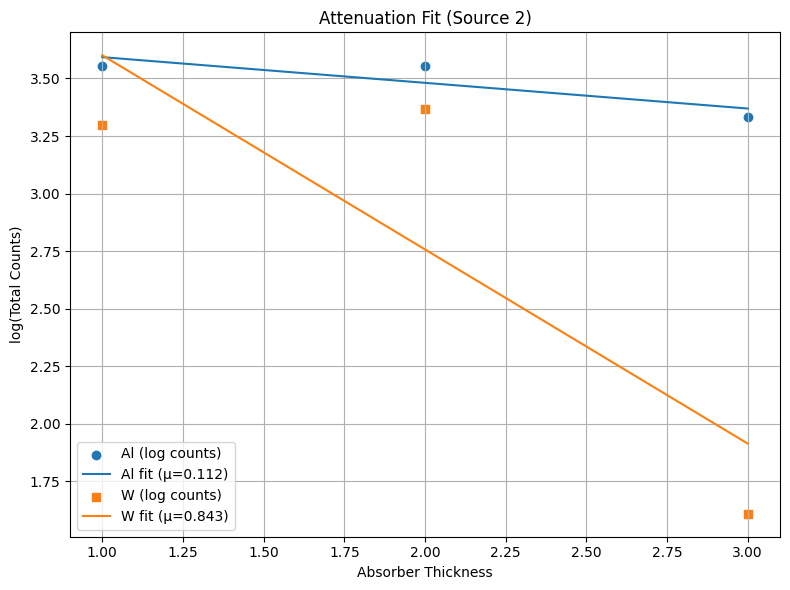

In [42]:
# Fit and plot for Source 2
μ2_al, al2_fit = attenuation_coefficient(thickness2, al2_totals[:min_len_2])
μ2_w, w2_fit = attenuation_coefficient(thickness2, w2_totals[:min_len_2])

print(f"Estimated μ for Al (source 2): {μ2_al:.3f}")
print(f"Estimated μ for W  (source 2): {μ2_w:.3f}")

plt.figure(figsize=(8, 6))
plt.scatter(thickness2, np.log(al2_totals[:min_len_2]), label='Al (log counts)', marker='o')
plt.plot(thickness2, np.polyval(al2_fit, thickness2), label=f'Al fit (μ={μ2_al:.3f})')

plt.scatter(thickness2, np.log(w2_totals[:min_len_2]), label='W (log counts)', marker='s')
plt.plot(thickness2, np.polyval(w2_fit, thickness2), label=f'W fit (μ={μ2_w:.3f})')

plt.xlabel("Absorber Thickness")
plt.ylabel("log(Total Counts)")
plt.title("Attenuation Fit (Source 2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()